# Creating a wildtype (WT / PD0), and Parkinson degeneration (PD2) network

In the directory ```network_path``` we have three sub directories ```PD0```, ```PD2-ref``` and ```PD2```. In order to generate the ```PD2``` network, we degenerate the ```PD0``` network by swapping the WT morphologies for the PD2 morphologies. In addition a subset of the synapses in the ```PD2-ref``` network are added to compensate for differences in pruning.

We need to specify a ```connection_override``` file. The difference compared to the standard connection file is that it contains ```recovery``` information, i.e. the fraction of synapses from the ```PD2-ref``` network that should be added to the ```PD2``` network.

The ```rc``` object is a ```ipyparallel``` ```RemoteClient``` object for parallel execution.

If you want to remap external input that was removed to a new position, then use ```remap_removed_input = True```

In [1]:
import os

network_path = os.path.join("networks","PD-example-2_ref_0.9")

network_path_pd0 = os.path.join(network_path, "PD0")
network_path_pd2_ref = os.path.join(network_path, "PD2-ref")
network_path_pd2 = os.path.join(network_path, "PD2")

network_size = 200
input_config = "test-input.json"  # Only background input will be used in this example

snudda_data_base_path = os.path.join("..", "..", "..", "..", "BasalGangliaData", "Parkinson", "20220225")
snudda_data_pd0 = os.path.join(snudda_data_base_path, "PD0")
snudda_data_pd2 = os.path.join(snudda_data_base_path, "PD2")

network_config_pd0 = os.path.join(snudda_data_base_path, "connectivity", "network-config.json")
network_config_pd2 = os.path.join(snudda_data_base_path, "connectivity", "network-config-PD-synapse-recovery.json")

input_pd0 = os.path.join(network_path_pd0, "input-spikes.hdf5")
input_pd2 = os.path.join(network_path_pd2, "input-spikes.hdf5")

# Do we want to remap removed input?
#remap_removed_input = False
#remapped_fraction = 0.0

# Do we want to remap removed input?
remap_removed_input = True
remapped_fraction = 0.9

rc = None

## First generate the WT reference network

In [2]:
from snudda import SnuddaInit

si = SnuddaInit(network_path=network_path_pd0, random_seed=123456, snudda_data=snudda_data_pd0,
                struct_def={"Striatum": network_size}, connection_override_file=network_config_pd0)

Adding Striatum with 200 neurons
Using cube for striatum
Neurons for striatum read from /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum
Adding neurons: FS from dir /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
Parameter file not found: /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/0/parameters.json
Mechanism file not found: /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/0/mechanisms.json
Parameter file not found: /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/1/parameters.json
Mechanism file not found: /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/1/mechanisms.json
Parameter file not found: /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/3

In [3]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path_pd0, verbose=False, rc=rc)
sp.place()

Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD0 from networks/PD-example-2_ref_0.9/PD0/network-config.json


In [4]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path_pd0, rc=rc)
sd.detect()

Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD0 from networks/PD-example-2_ref_0.9/PD0/network-config.json
No d_view specified, running distribute neurons in serial
Processing hyper voxel : 36/180 (200 neurons)
Processing hyper voxel : 66/180 (190 neurons)
Processing hyper voxel : 41/180 (189 neurons)
Processing hyper voxel : 37/180 (156 neurons)
Processing hyper voxel : 71/180 (145 neurons)
Processing hyper voxel : 35/180 (127 neurons)
Processing hyper voxel : 67/180 (102 neurons)
Processing hyper voxel : 42/180 (93 neurons)
Processing hyper voxel : 31/180 (81 neurons)
Processing hyper voxel : 6/180 (81 neurons)
Processing hyper voxel : 65/180 (72 neurons)
Processing hyper voxel : 40/180 (68 neurons)
Processing hyper voxel : 72/180 (54 neurons)
Processing hyper voxel : 11/180 (50 neurons)
Processing hyper voxel : 61/180 (49 neurons)
Processing hyper voxel : 70/180 (30 neurons)
Processing hyper voxel : 5/180 (26 neurons)
Processing hyper voxel : 32/180 (25 neuro

In [5]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path_pd0, rc=rc)
sp.prune()

No file networks/PD-example-2_ref_0.9/PD0/pruning_merge_info.json
Read 448670 out of total 448670 synapses
Read 5 out of total 5 gapJunctions


In [6]:
import os
from snudda.input import SnuddaInput
si = SnuddaInput(network_path=network_path_pd0, 
                 input_config_file=input_config,
                 verbose=False)
si.generate()

Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD0 from networks/PD-example-2_ref_0.9/PD0/network-config.json
Writing spikes to networks/PD-example-2_ref_0.9/PD0/input-spikes.hdf5


## Generate a PD2 reference network

This network will not have the same synapses as the WT, but it is used in order to add "recovery synapses" to compensate for part of the degeneration.

In [7]:
from snudda import SnuddaInit

si = SnuddaInit(network_path=network_path_pd2_ref, random_seed=123456, snudda_data=snudda_data_pd2,
                struct_def={"Striatum": network_size}, connection_override_file=network_config_pd2)

Adding Striatum with 200 neurons
Using cube for striatum
Neurons for striatum read from /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum
Adding neurons: FS from dir /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
Parameter file not found: /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs/0/parameters.json
Mechanism file not found: /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs/0/mechanisms.json
Parameter file not found: /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs/1/parameters.json
Mechanism file not found: /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs/1/mechanisms.json
Parameter file not found: /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs/3

In [8]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path_pd2_ref, verbose=False, rc=rc)
sp.place()

Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD2 from networks/PD-example-2_ref_0.9/PD2-ref/network-config.json


In [9]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path_pd2_ref, rc=rc)
sd.detect()

Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD2 from networks/PD-example-2_ref_0.9/PD2-ref/network-config.json
No d_view specified, running distribute neurons in serial
Processing hyper voxel : 36/180 (200 neurons)
Processing hyper voxel : 41/180 (198 neurons)
Processing hyper voxel : 66/180 (176 neurons)
Processing hyper voxel : 71/180 (157 neurons)
Processing hyper voxel : 37/180 (150 neurons)
Processing hyper voxel : 42/180 (125 neurons)
Processing hyper voxel : 67/180 (91 neurons)
Processing hyper voxel : 35/180 (87 neurons)
Processing hyper voxel : 72/180 (73 neurons)
Processing hyper voxel : 40/180 (73 neurons)
Processing hyper voxel : 6/180 (69 neurons)
Processing hyper voxel : 11/180 (59 neurons)
Processing hyper voxel : 65/180 (41 neurons)
Processing hyper voxel : 31/180 (38 neurons)
Processing hyper voxel : 70/180 (32 neurons)
Processing hyper voxel : 7/180 (26 neurons)
Processing hyper voxel : 12/180 (22 neurons)
Processing hyper voxel : 61/180 (20 ne

In [10]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path_pd2_ref, rc=rc)
sp.prune()

No file networks/PD-example-2_ref_0.9/PD2-ref/pruning_merge_info.json
Read 280756 out of total 280756 synapses
Read 5 out of total 5 gapJunctions


## Degenerating the PD0 network to get PD2 network

In [11]:
network_file_pd0 = os.path.join(network_path_pd0, "network-synapses.hdf5")
network_file_pd2_ref = os.path.join(network_path_pd2_ref, "network-synapses.hdf5")
network_file_pd2 = os.path.join(network_path_pd2, "network-synapses.hdf5")

from snudda.utils.swap_to_degenerated_morphologies_extended import SwapToDegeneratedMorphologiesExtended
swap = SwapToDegeneratedMorphologiesExtended(original_network_file=network_file_pd0,
                                             updated_network_file=network_file_pd2_ref,
                                             output_network_file=network_file_pd2,
                                             original_snudda_data_dir=snudda_data_pd0,
                                             updated_snudda_data_dir=snudda_data_pd2,
                                             original_input_file=input_pd0,
                                             output_input_file=input_pd2)
swap.write_new_network_file()
swap.write_new_input_file(remap_removed_input=remap_removed_input, remapped_fraction=remapped_fraction)
swap.close()

Failed to load cache from /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/fs/1/DR-rat-Mar-13-08-1-536-R-cor-rep-res3-61.swc-cache.pickle
Failed to load cache from /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/chin/str-chin-e170614_cell6-m17JUL301751_170614_no6_MD_cell_1_x63-v20190710/optim_chin_morph_renamed2019-11-08.swc-cache.pickle
Failed to load cache from /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/fs/3/MTC251001A-IDB-cor-rep-res3-61.swc-cache.pickle
Failed to load cache from /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/fs/0/BE104E-cor-rep-res3-61.swc-cache.pickle
Failed to load cache from /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/lts/8/lts_morp_9862_centered_no_axon_resampled-var8.swc-cache.pickle
Creating directory networks/PD-example-2_ref_0.9/PD2
Writing new network to networks/PD-example-2_ref_0.9/P

Processed input to dSPN_22 (144), keeping 83 out of 200 inputs (plus remapping 105 inputs)(41.50 %) (52.50 % remapped)
Processed input to iSPN_14 (145), keeping 127 out of 200 inputs (plus remapping 66 inputs)(63.50 %) (33.00 % remapped)
Processed input to dSPN_16 (146), keeping 130 out of 200 inputs (plus remapping 63 inputs)(65.00 %) (31.50 % remapped)
Processed input to iSPN_16 (147), keeping 142 out of 200 inputs (plus remapping 52 inputs)(71.00 %) (26.00 % remapped)
Processed input to dSPN_27 (148), keeping 70 out of 200 inputs (plus remapping 118 inputs)(35.00 %) (59.00 % remapped)
Processed input to dSPN_10 (149), keeping 98 out of 200 inputs (plus remapping 92 inputs)(49.00 %) (46.00 % remapped)
Processed input to dSPN_35 (15), keeping 100 out of 200 inputs (plus remapping 90 inputs)(50.00 %) (45.00 % remapped)
Processed input to dSPN_17 (150), keeping 63 out of 200 inputs (plus remapping 124 inputs)(31.50 %) (62.00 % remapped)
Processed input to iSPN_6 (151), keeping 134 out o

Processed input to iSPN_35 (28), keeping 111 out of 200 inputs (plus remapping 81 inputs)(55.50 %) (40.50 % remapped)
Processed input to dSPN_24 (29), keeping 124 out of 200 inputs (plus remapping 68 inputs)(62.00 %) (34.00 % remapped)
Processed input to iSPN_24 (3), keeping 133 out of 200 inputs (plus remapping 60 inputs)(66.50 %) (30.00 % remapped)
Processed input to iSPN_2 (30), keeping 101 out of 200 inputs (plus remapping 89 inputs)(50.50 %) (44.50 % remapped)
Processed input to iSPN_22 (31), keeping 112 out of 200 inputs (plus remapping 79 inputs)(56.00 %) (39.50 % remapped)
Processed input to dSPN_17 (32), keeping 51 out of 200 inputs (plus remapping 134 inputs)(25.50 %) (67.00 % remapped)
Processed input to iSPN_13 (33), keeping 117 out of 200 inputs (plus remapping 75 inputs)(58.50 %) (37.50 % remapped)
Processed input to iSPN_20 (34), keeping 130 out of 200 inputs (plus remapping 64 inputs)(65.00 %) (32.00 % remapped)
Processed input to dSPN_35 (35), keeping 73 out of 200 inp

Processed input to dSPN_29 (92), keeping 73 out of 200 inputs (plus remapping 114 inputs)(36.50 %) (57.00 % remapped)
Processed input to dSPN_22 (93), keeping 100 out of 200 inputs (plus remapping 90 inputs)(50.00 %) (45.00 % remapped)
Processed input to iSPN_15 (94), keeping 92 out of 200 inputs (plus remapping 97 inputs)(46.00 %) (48.50 % remapped)
Processed input to iSPN_26 (95), keeping 140 out of 200 inputs (plus remapping 54 inputs)(70.00 %) (27.00 % remapped)
Processed input to iSPN_7 (96), keeping 77 out of 200 inputs (plus remapping 110 inputs)(38.50 %) (55.00 % remapped)
Processed input to dSPN_4 (97), keeping 118 out of 200 inputs (plus remapping 74 inputs)(59.00 %) (37.00 % remapped)
Processed input to iSPN_10 (98), keeping 108 out of 200 inputs (plus remapping 83 inputs)(54.00 %) (41.50 % remapped)
Processed input to dSPN_19 (99), keeping 38 out of 200 inputs (plus remapping 146 inputs)(19.00 %) (73.00 % remapped)


## Plotting of a degenerated neuron

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD0 from networks/PD-example-2_ref_0.9/PD0/network-config.json
Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD2 from networks/PD-example-2_ref_0.9/PD2/network-synapses.hdf5
Plotting 200 external synapses
Plotting 193 external synapses
Figure written: networks/PD-example-2_ref_0.9/PD2/figures/input-to-53-iSPN_11-and-internal-synapses.png


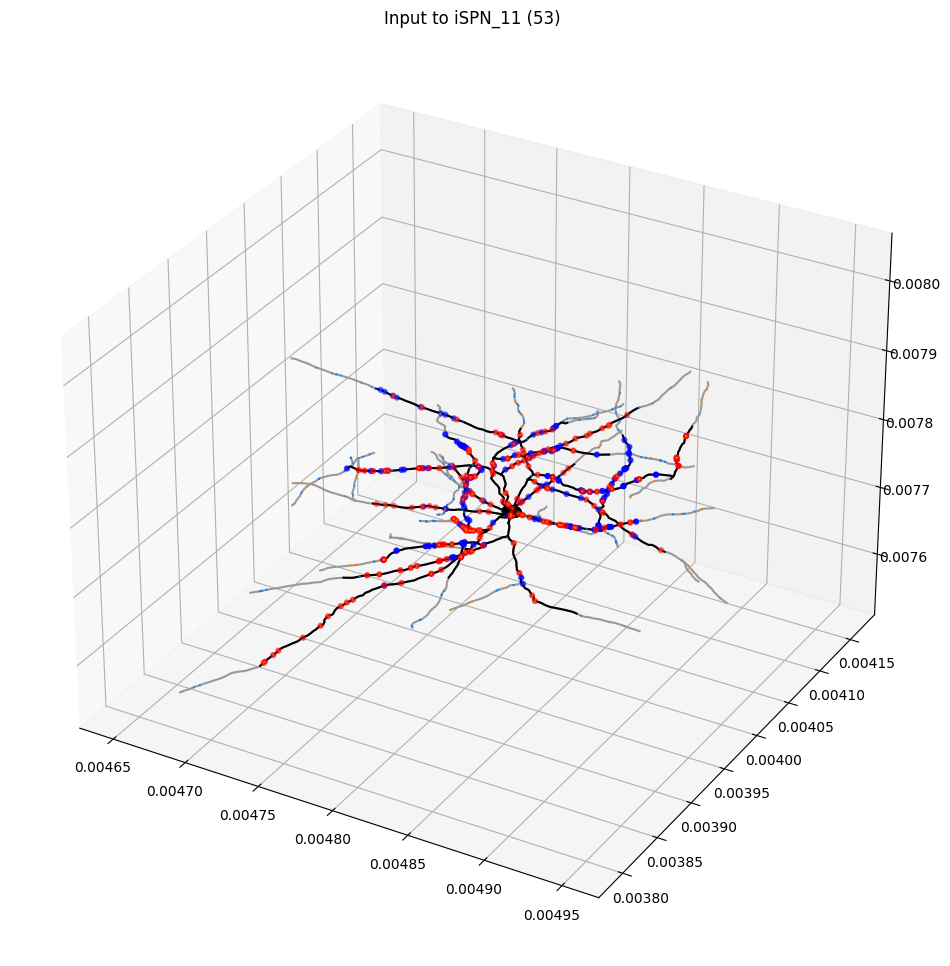

In [12]:
%matplotlib inline
from snudda.plotting.plot_degeneration import PlotDegeneration

pd = PlotDegeneration(original_network_path=network_path_pd0,
                      degenerated_network_path=network_path_pd2)
plot_neuron_id = 53
pd.plot_neuron(neuron_id=plot_neuron_id, figure_size=(12,12), show_internal_synapses=True)

In [13]:
from snudda.analyse.analyse_input import AnalyseInput

pd0_input_info = AnalyseInput(input_file=input_pd0, network_path=network_path_pd0)
pd2_input_info = AnalyseInput(input_file=input_pd2, network_path=network_path_pd2)

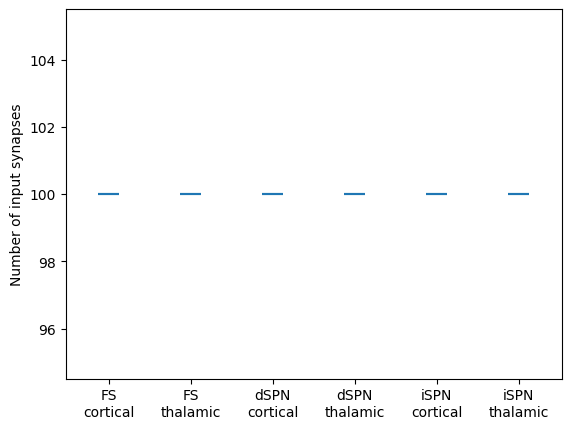

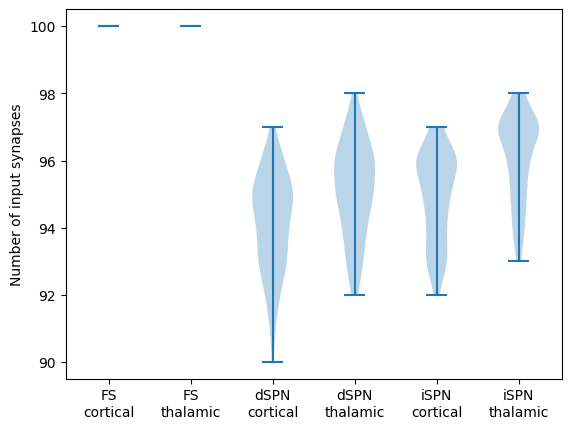

In [14]:
pd0_input_info.plot_input_count("PD0-input_example.png")
pd2_input_info.plot_input_count("PD2-input_example.png")

In [15]:
cmd_str1 = f"snudda_load {network_path_pd0}/network-synapses.hdf5 --countSyn"
cmd_str2 = f"snudda_load {network_path_pd2}/network-synapses.hdf5 --countSyn"
cmd_str3 = f"snudda_load {network_path_pd2_ref}/network-synapses.hdf5 --countSyn"

print("WT")
os.system(cmd_str1)
print("\nPD2")
os.system(cmd_str2)
print("\nPD2 degenerated")
os.system(cmd_str3)

WT
Loading networks/PD-example-2_ref_0.9/PD0/network-synapses.hdf5
Loading config data from HDF5
Loading 200 neurons with 21326 synapses and 3 gap junctions
Load done. 0.0
ChIN -> dSPN: 197 synapses
ChIN -> iSPN: 91 synapses
FS -> FS: 5 synapses
FS -> dSPN: 786 synapses
FS -> iSPN: 501 synapses
LTS -> ChIN: 6 synapses
LTS -> dSPN: 5 synapses
dSPN -> ChIN: 12 synapses
dSPN -> dSPN: 4559 synapses
dSPN -> iSPN: 1050 synapses
iSPN -> ChIN: 8 synapses
iSPN -> dSPN: 5079 synapses
iSPN -> iSPN: 9027 synapses

PD2
Loading networks/PD-example-2_ref_0.9/PD2/network-synapses.hdf5
Loading config data from HDF5
Loading 200 neurons with 9380 synapses and 3 gap junctions
Load done. 0.0
ChIN -> dSPN: 46 synapses
ChIN -> iSPN: 24 synapses
FS -> FS: 9 synapses
FS -> dSPN: 703 synapses
FS -> iSPN: 1058 synapses
LTS -> ChIN: 6 synapses
dSPN -> ChIN: 12 synapses
dSPN -> dSPN: 1386 synapses
dSPN -> iSPN: 383 synapses
iSPN -> ChIN: 8 synapses
iSPN -> dSPN: 1659 synapses
iSPN -> iSPN: 4086 synapses

PD2 degen

0